##### Here we load in the data and then we do bunch of analysis on it

In [1]:
##imports
import pandas as pd
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


cluster = False
if cluster:
    path = '/home/sheczko/ptmp/data/' #Cluster
else:
    path = 'data/' ##local



In [135]:
tang_df_ridge_1000_comp.mean()

0     0.257170
1     0.268421
2     0.271935
3     0.272668
4     0.250759
5     0.271432
6     0.260713
7     0.252391
8     0.256634
9     0.271184
10    0.256556
11    0.263100
dtype: float64

In [373]:
## load the data paths
tangent_paths_resutls_ridge = glob.glob(path + 'results/ridge_regression/tangent/*results*newalpha*') ##get the ridge tanget prediction accuracies
prec_paths_results_ridge = glob.glob(path + 'results/ridge_regression/precison/*results*newalpha*') ## percisn matrix as features
pearson_paths_resutls_ridge = glob.glob(path + 'results/ridge_regression/pearson/*results*') #person correlation matrix, flattened
partial_paths_results_ridge = glob.glob(path + 'results/ridge_regression/partial/*results*') #partial correlation matrix flattened

tangent_paths_resutls_SVR = glob.glob(path + 'results/SV_regression/tangent2/SVM_results*') ##SVR resutls - only tangetn correlation done
tangent_paths_resutls_PLS = glob.glob(path + 'results/PLS/tangent/PLS_results*') ##PLS results - only tangent exists

tangent_paths_resutls_ridge_5000_comp = glob.glob(path + 'results/ridge_regression/tangent/*results*n_feat_5000*') ##ridge 1000 comp, feature selection
tangent_paths_resutls_ridge_1000_comp = glob.glob(path + 'results/ridge_regression/tangent/*results*FStd_cor*') ##ridge 1000 comp, feature selection
tangent_paths_resutls_ridge_500_comp = glob.glob(path + 'results/ridge_regression/tangent/*results*n_feat_500_*') ##ridge 500 comp, feature selection
tangent_paths_resutls_ridge_100_comp = glob.glob(path + 'results/ridge_regression/tangent/*results*n_feat_100_*') ##ridge 100 comp, feature selection

tangent_paths_resutls_ridge_1000_comp_iq_only = glob.glob(path + 'results/ridge_regression/tangent2/*results*iq_only*') ##ridge 1000 comp, iq only feature selection
tangent_paths_resutls_ridge_1000_comp_edu_only = glob.glob(path + 'results/ridge_regression/tangent/*results*edu_only*') ##ridge 1000 comp, edo only feature selection


tangent_paths_preds_ridge_1000_comp = glob.glob(path + 'results/ridge_regression/tangent/*preds_FStd_cor_tangent*') ###Ridge 1000 comp, feature selection
tangent_paths_preds_ridge_500_comp = glob.glob(path + 'results/ridge_regression/tangent/*preds*n_feat_500_*') ###Ridge 500 comp, feature selection
tangent_paths_preds_ridge_100_comp = glob.glob(path + 'results/ridge_regression/tangent/*preds*n_feat_1000_*') ###Ridge 100 comp, feature selection


tangent_paths_preds_ridge = glob.glob(path + 'results/ridge_regression/tangent/*preds*newalpha*') ###Preds ridge all componets




tangent_paths_resutls_SVR_1000_comp = glob.glob(path + 'results/SV_regression/tangent/*results*n_feat_1000*') ##SVR 1000 comp, feature selection
tangent_paths_resutls_SVR_500_comp = glob.glob(path + 'results/SV_regression/tangent/*results*n_feat_500*') ####SVR 500 comp, feature selection
tangent_paths_resutls_SVR_100_comp = glob.glob(path + 'results/SV_regression/tangent/*results*n_feat_100_*') ###SVR 100 comp, feature selection




##use the paths to concentarte the target variables into dataframes+

tang_df_ridge = pd.concat((pd.read_csv(f)['GCA_var'] for f in tangent_paths_resutls_ridge),axis = 1, ignore_index=True) #get the df with all prediction vs real explained variance, tangent correlation with ridge regression 
tang_df_svm = pd.concat((pd.read_csv(f)['GCA_var'] for f in tangent_paths_resutls_SVR),axis = 1, ignore_index=True) #get the df with all prediction vs real explained variance, tangent correlation with SMR regression 
tang_df_pls = pd.concat((pd.read_csv(f)['GCA_var'] for f in tangent_paths_resutls_PLS),axis = 1, ignore_index=True) #tangent PLS dataframe


pear_df_ridge = pd.concat((pd.read_csv(f)['GCA_var'] for f in pearson_paths_resutls_ridge),axis = 1, ignore_index=True) #Person ridge 
prc_df_ridge = pd.concat((pd.read_csv(f)['GCA_var'] for f in prec_paths_results_ridge),axis = 1, ignore_index=True) #Precision ridge
prt_df_ridge = pd.concat((pd.read_csv(f)['GCA_var'] for f in partial_paths_results_ridge),axis = 1, ignore_index=True) #Partial ridge


target_var = 'GCA_var'

tang_df_ridge_5000_comp = pd.concat((pd.read_csv(f)[target_var] for f in tangent_paths_resutls_ridge_5000_comp),axis = 1, ignore_index=True)
tang_df_ridge_1000_comp = pd.concat((pd.read_csv(f)[target_var] for f in tangent_paths_resutls_ridge_1000_comp),axis = 1, ignore_index=True)
tang_df_ridge_500_comp = pd.concat((pd.read_csv(f)[target_var] for f in tangent_paths_resutls_ridge_500_comp),axis = 1, ignore_index=True)
tang_df_ridge_100_comp = pd.concat((pd.read_csv(f)[target_var] for f in tangent_paths_resutls_ridge_100_comp),axis = 1, ignore_index=True)

tang_df_ridge_1000_comp_iq_only = pd.concat((pd.read_csv(f)[target_var] for f in tangent_paths_resutls_ridge_1000_comp_iq_only),axis = 1, ignore_index=True)
tang_df_ridge_1000_comp_edu_only = pd.concat((pd.read_csv(f)[target_var] for f in tangent_paths_resutls_ridge_1000_comp_edu_only),axis = 1, ignore_index=True)



tang_df_SVR_1000_comp = pd.concat((pd.read_csv(f)[target_var] for f in tangent_paths_resutls_SVR_1000_comp),axis = 1, ignore_index=True)
tang_df_SVR_500_comp = pd.concat((pd.read_csv(f)[target_var] for f in tangent_paths_resutls_SVR_500_comp),axis = 1, ignore_index=True)
tang_df_SVR_100_comp = pd.concat((pd.read_csv(f)[target_var] for f in tangent_paths_resutls_SVR_100_comp),axis = 1, ignore_index=True)


#preds_tang_df_ridge_1000_comp



#for n in n_comp:
#    tang_df_ridge_comp = pd.concat((pd.read_csv(f)['GCA_corr'] for f in tangent_paths_resutls_ridge_comp),axis = 1, ignore_index=True)



'data/results/ridge_regression/tangent/ridge_preds_newalpha_cor_tangent_atlas-canICA100.csv'

In [374]:
##get the column names (atlses) for the dataframes

tangent_atlas_names_ridge = [s.split('_')[-1].split('.')[0].split('-')[1:] for s in tangent_paths_resutls_ridge]
tangent_atlas_names_ridge_2 = []
for list in tangent_atlas_names_ridge:
     tangent_atlas_names_ridge_2.append('_'.join(list))
tang_df_ridge.columns = tangent_atlas_names_ridge_2



tangent_atlas_names_SVR = [s.split('_')[-1].split('.')[0].split('-')[1:] for s in tangent_paths_resutls_SVR]
tangent_atlas_names_SVR_2 = []
for list in tangent_atlas_names_SVR:
    tangent_atlas_names_SVR_2.append('_'.join(list))
tang_df_svm.columns = tangent_atlas_names_SVR_2



tangent_atlas_names_PLS = [s.split('_')[-1].split('.')[0].split('-')[1:] for s in tangent_paths_resutls_PLS]
tangent_atlas_names_PLS_2 = []
for list in tangent_atlas_names_PLS:
    tangent_atlas_names_PLS_2.append('_'.join(list))
tang_df_pls.columns = tangent_atlas_names_PLS_2





tangent_atlas_names_FStd = [s.split('_')[-1].split('.')[0].split('-')[1:] for s in tangent_paths_resutls_ridge_1000_comp]
tangent_atlas_names_FStd_2 = []
for list in tangent_atlas_names_FStd:
    tangent_atlas_names_FStd_2.append('_'.join(list))

    
#tang_df_ridge_5000_comp.columns = tangent_atlas_names_FStd_2
tang_df_ridge_1000_comp.columns = tangent_atlas_names_FStd_2
tang_df_ridge_500_comp.columns = tangent_atlas_names_FStd_2
tang_df_ridge_100_comp.columns = tangent_atlas_names_FStd_2

tang_df_SVR_1000_comp.columns = tangent_atlas_names_FStd_2
tang_df_SVR_500_comp.columns = tangent_atlas_names_FStd_2
tang_df_SVR_100_comp.columns = tangent_atlas_names_FStd_2


tangent_atlas_names_FStd_iq_only = [s.split('_')[-1].split('.')[0].split('-')[1:] for s in tangent_paths_resutls_ridge_1000_comp_iq_only]
tangent_atlas_names_FStd_iq_only_2 = []
for list in tangent_atlas_names_FStd_iq_only:
    tangent_atlas_names_FStd_iq_only_2.append('_'.join(list))

tang_df_ridge_1000_comp_iq_only.columns = tangent_atlas_names_FStd_iq_only_2


tangent_atlas_names_FStd_edu_only = [s.split('_')[-1].split('.')[0].split('-')[1:] for s in tangent_paths_resutls_ridge_1000_comp_edu_only]
tangent_atlas_names_FStd_edu_only_2 = []
for list in tangent_atlas_names_FStd_edu_only:
    tangent_atlas_names_FStd_edu_only_2.append('_'.join(list))

tang_df_ridge_1000_comp_edu_only.columns = tangent_atlas_names_FStd_edu_only_2






In [363]:
tang_df_ridge_1000_comp_edu_only.mean()

Glasser            0.469504
DS00350            0.487353
canICA100          0.460514
CPAC200            0.500532
Schaefer400        0.482414
AAL                0.467550
300ROis            0.478708
canICA200          0.486280
DictLearn200       0.485882
AICHAJoliot2015    0.482967
DictLearn400       0.483741
Schaefer200        0.477986
dtype: float64

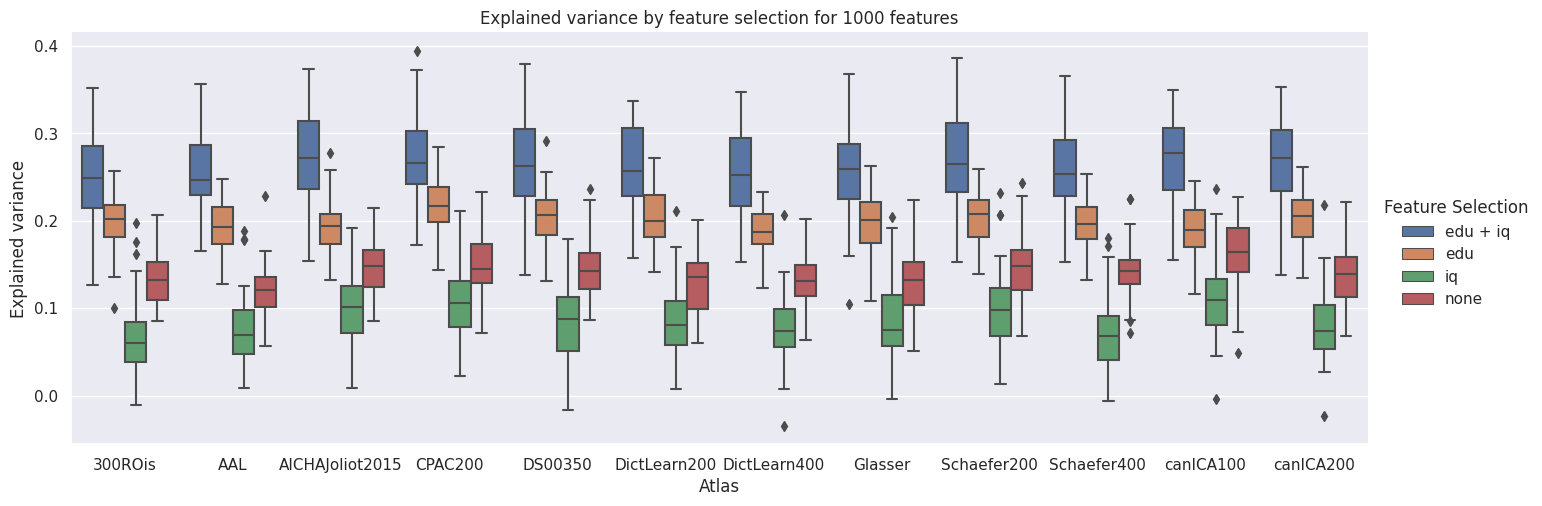

In [375]:
target_var_name = 'Explained variance'




melted_df = tang_df_ridge_1000_comp.sort_index(axis = 1).melt(var_name = 'Atlas',value_name = target_var_name)
melted_df['Feature Selection'] = 'edu + iq' 

melted_df2 = tang_df_ridge[tang_df_ridge_1000_comp.columns].sort_index(axis = 1).melt(var_name = 'Atlas',value_name = target_var_name)
melted_df2['Feature Selection'] = 'none' 


melted_df3 = tang_df_ridge_1000_comp_iq_only.sort_index(axis = 1).melt(var_name = 'Atlas',value_name = target_var_name)
melted_df3['Feature Selection'] = 'iq' 


melted_df4 = tang_df_ridge_1000_comp_edu_only.sort_index(axis = 1).melt(var_name = 'Atlas',value_name = target_var_name)
melted_df4['Feature Selection'] = 'edu' 

melt_total = pd.concat([melted_df,melted_df4,melted_df3,melted_df2])



plot = sns.catplot(data = melt_total, x = 'Atlas', y = target_var_name,hue = 'Feature Selection',kind = 'box',aspect = 2.8).set(title = f"{target_var_name} by feature selection for 1000 features")
fig = plot.figure
fig.savefig(path + 'results/plots/expVar_by_FS.pdf')

[Text(0.5, 1.0, 'Fold 2 (medianaccuracy)')]

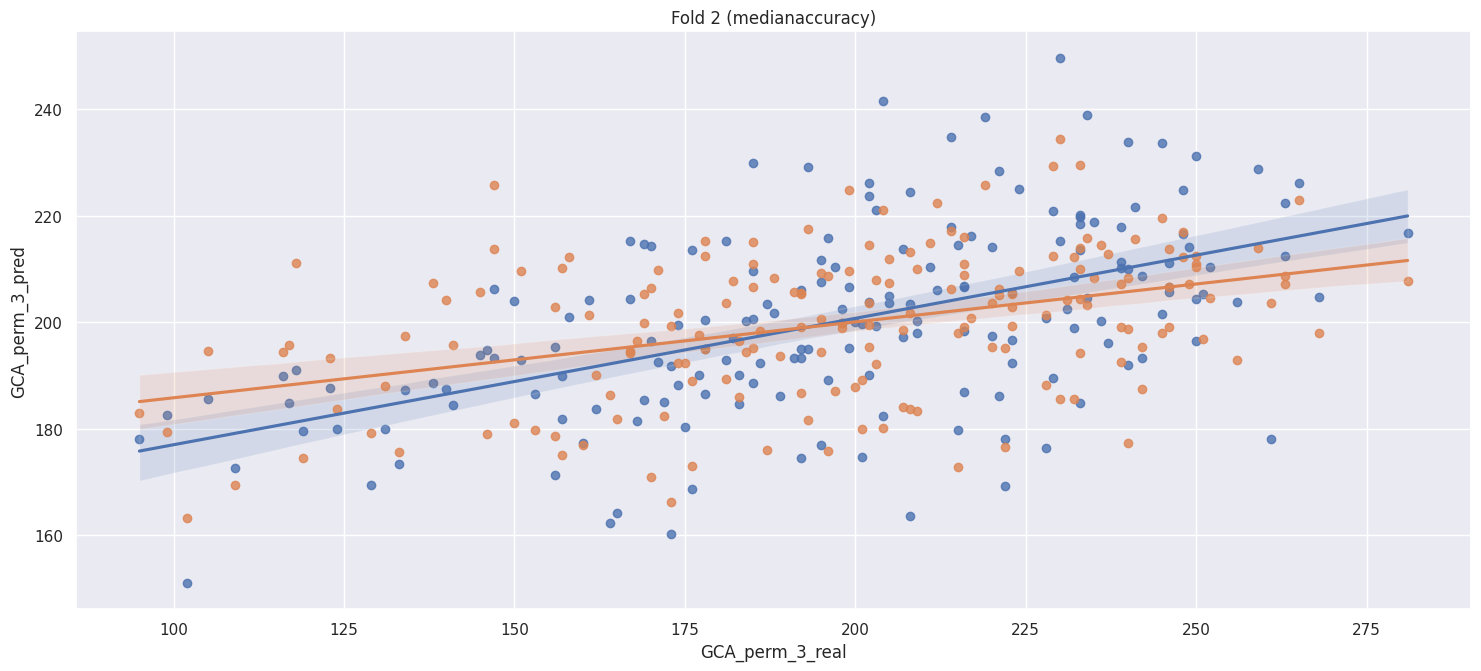

In [325]:
##predictions

preds_df_feature_sel = pd.read_csv(tangent_paths_preds_ridge_1000_comp[8])
preds_df_no_selection = pd.read_csv(tangent_paths_preds_ridge[-1])

sns.regplot(y = preds_df_feature_sel['GCA_perm_3_pred'], x = preds_df_feature_sel['GCA_perm_3_real'])
sns.regplot(y = preds_df_no_selection['GCA_perm_3_pred'], x = preds_df_no_selection['GCA_perm_3_real']).set(title = 'Fold 2 (medianaccuracy)')
#plt.xlim([100,300])
#plt.ylim([100,300])



#print(tang_df_ridge_1000_comp.loc[tang_df_ridge_1000_comp.canICA100 == tang_df_ridge_1000_comp.canICA100.median])

data/results/ridge_regression/tangent/ridge_preds_FStd_cor_tangent_atlas-AICHAJoliot2015.csv
data/results/ridge_regression/tangent/ridge_preds_FStd_cor_tangent_atlas-canICA100.csv


PearsonRResult(statistic=0.5343792080702817, pvalue=1.8533468724888752e-14)

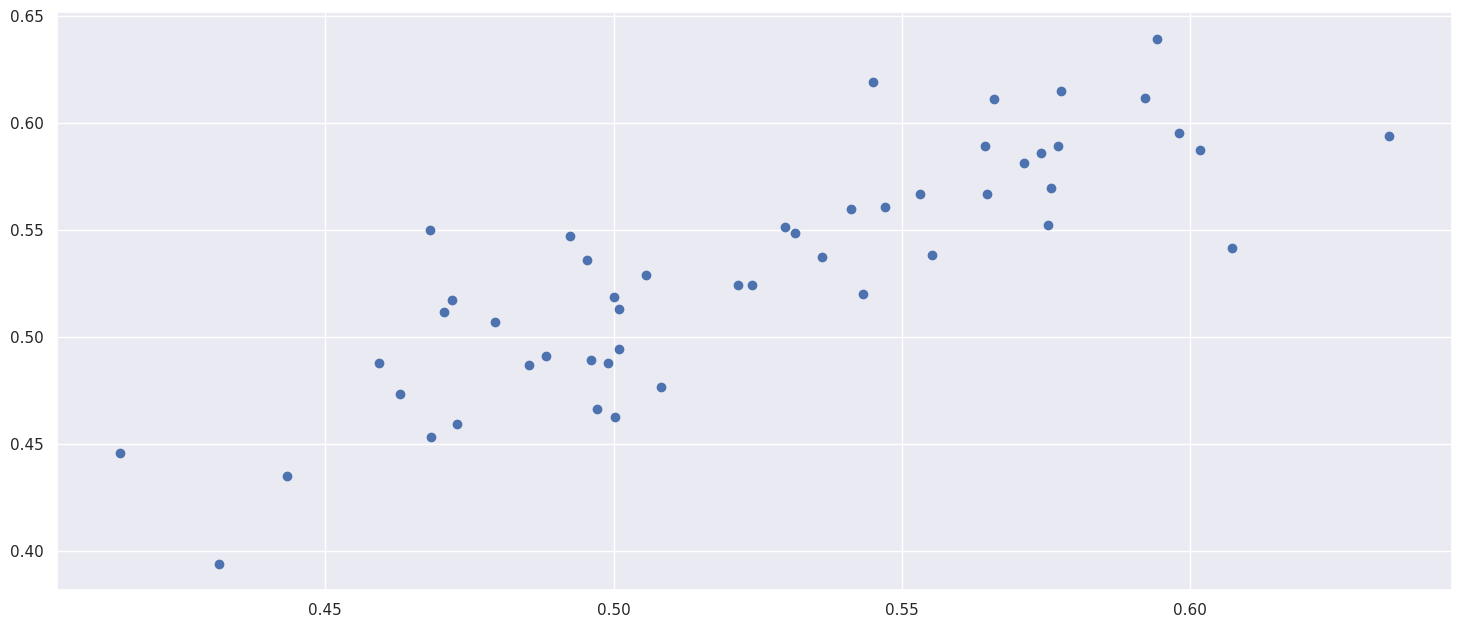

In [358]:
plt.scatter(tang_df_ridge_1000_comp.AICHAJoliot2015,tang_df_ridge_1000_comp.canICA100)
print(tangent_paths_preds_ridge_1000_comp[3])
print(tangent_paths_preds_ridge_1000_comp[8])

preds_df_feature_sel_AICHA = pd.read_csv(tangent_paths_preds_ridge_1000_comp[3])

combined =  np.array([preds_df_feature_sel_AICHA['GCA_perm_3_pred'],preds_df_feature_sel['GCA_perm_3_pred']])
from scipy.stats import pearsonr
pearsonr(combined.mean(axis = 0),preds_df_feature_sel_AICHA['GCA_perm_3_real'])


In [334]:
tang_df_ridge_1000_comp


,AAL,canICA200,AICHAJoliot2015,CPAC200,300ROis,canICA100,DictLearn200,DictLearn400,Glasser,Schaefer200,Schaefer400,DS00350
0,0.485989,0.534659,0.536191,0.533526,0.522577,0.537207,0.507747,0.500699,0.520525,0.515140,0.486617,0.529904
1,0.453234,0.486601,0.468342,0.476762,0.448361,0.453168,0.428192,0.422809,0.433877,0.474453,0.438187,0.453428
2,0.511783,0.511222,0.495361,0.517443,0.510762,0.535737,0.509092,0.521343,0.499006,0.537874,0.512002,0.512559
3,0.485444,0.498658,0.496134,0.534929,0.527186,0.489404,0.461419,0.489092,0.494752,0.503406,0.496211,0.489043
4,0.486096,0.461482,0.471981,0.499976,0.494447,0.517045,0.478622,0.455668,0.497179,0.553760,0.483082,0.464789
5,0.485510,0.514619,0.500018,0.516011,0.515790,0.518422,0.481129,0.483025,0.492852,0.500486,0.514292,0.472804
6,0.597731,0.542797,0.575923,0.560000,0.536837,0.569418,0.546136,0.557197,0.546989,0.560666,0.540458,0.543134
7,0.449683,0.447881,0.443364,0.488478,0.418055,0.434907,0.477767,0.435939,0.444869,0.464882,0.416491,0.458663
8,0.447046,0.461415,0.459346,0.467726,0.461635,0.487587,0.463341,0.447747,0.437017,0.436786,0.434895,0.462543
9,0.498164,0.501812,0.497085,0.501818,0.518827,0.466321,0.486316,0.524808,0.484362,0.493047,0.501285,0.502208


<AxesSubplot: >

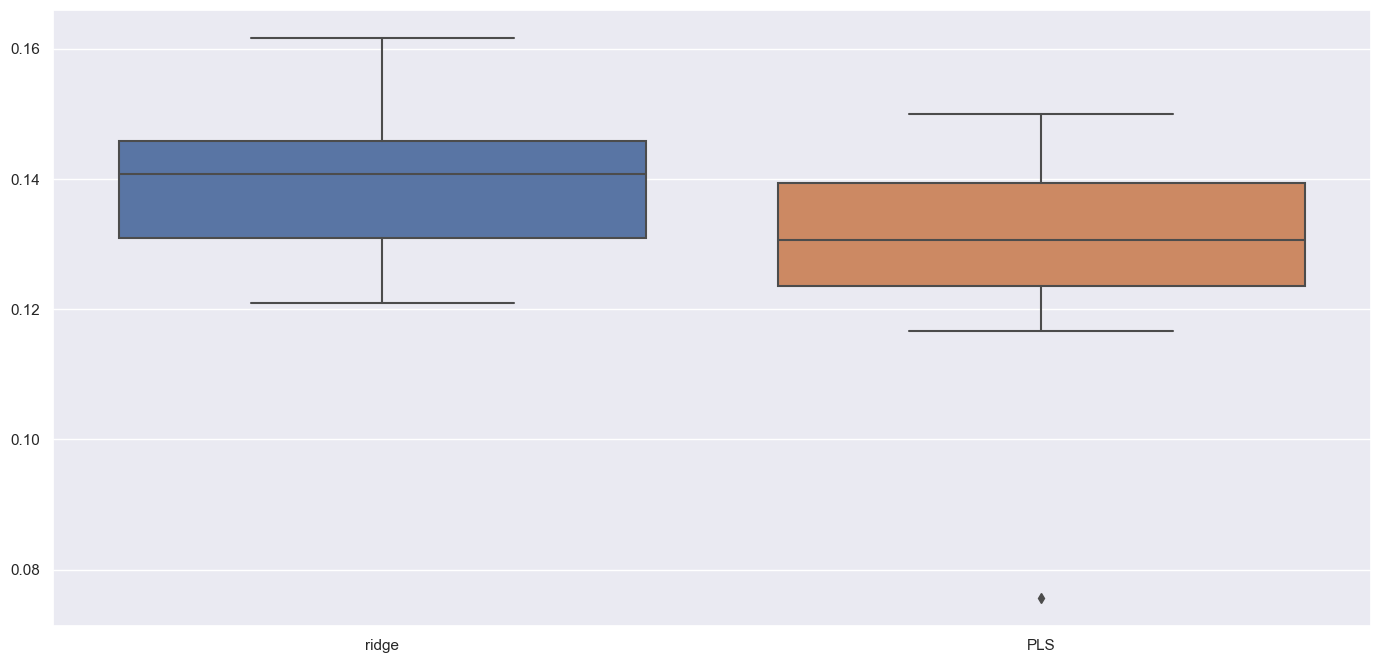

In [65]:
df_means_regressions_ridge_PLS =  pd.concat([tang_df_ridge[tang_df_pls.columns].mean(),tang_df_pls.mean()],axis = 1)

df_means_regressions_ridge_PLS.columns = ['ridge', 'PLS']

sns.boxplot(df_means_regressions_ridge_PLS)

In [34]:
print(tang_df_svm.mean())

print(tang_df_ridge[tang_df_svm.columns].mean().mean( ))

0.1482878689661324
0.1513298130110928


<AxesSubplot: title={'center': 'tangent correlation PLS'}>

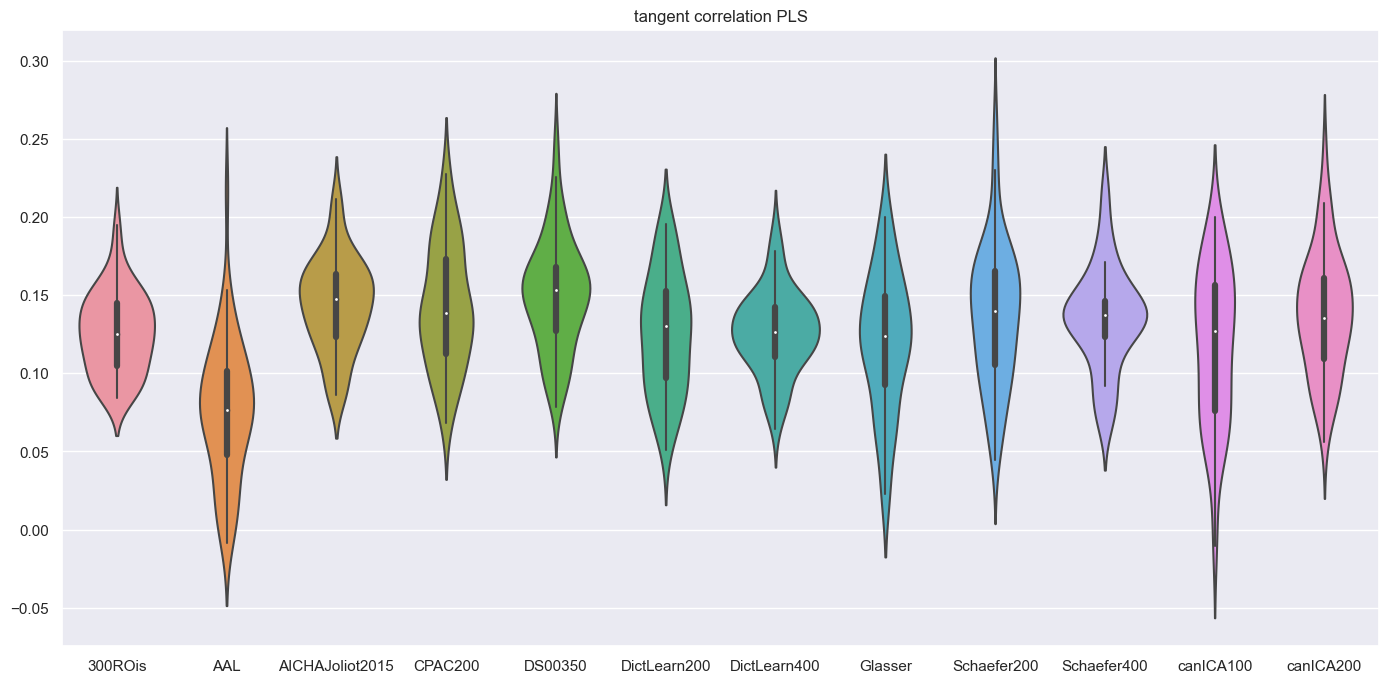

In [9]:
sns.set(rc = {'figure.figsize':(17,8)})

tang_df_pls_alphabetical = tang_df_pls.reindex(sorted(tang_df_pls.columns),axis = 1)


plt.title('tangent correlation PLS')


sns.violinplot(tang_df_pls_alphabetical)



#tang_df_pls.mean().max

In [314]:
df_results_alph = df_results.sort_values('Atlas name').reset_index(drop = True)

In [326]:
n_areas = np.array([300,116,384,40,333,200,84,350,70,97,75,100,200,400,360,83,48,48,103,136,200,400,907,17,17,100,200])

#df_results_alph.to_csv(path + 'results/result_accuracies/tangent_all_atlases.csv')
print(df_results_alph.to_latex(index = False))

\begin{tabular}{lrrr}
\toprule
Atlas name & Mean expalinde variance & Standard deviation across 50 folds & number of parcels \\
\midrule
300ROis & 0.133008 & 0.027744 & 300 \\
AAL & 0.120897 & 0.029219 & 116 \\
AICHAJoliot2015 & 0.147621 & 0.031160 & 384 \\
Brodmann & 0.086448 & 0.033803 & 40 \\
CAPRSC & 0.131609 & 0.032345 & 333 \\
CPAC200 & 0.150040 & 0.034615 & 200 \\
DKT & 0.111722 & 0.037954 & 84 \\
DS00350 & 0.145230 & 0.033284 & 350 \\
Desikan & 0.096167 & 0.038799 & 70 \\
DesikanKlein & 0.103243 & 0.035522 & 97 \\
Destrieux & 0.130806 & 0.029424 & 75 \\
DictLearn100 & 0.169408 & 0.039529 & 100 \\
DictLearn200 & 0.130908 & 0.036231 & 200 \\
DictLearn400 & 0.130910 & 0.030439 & 400 \\
Glasser & 0.130694 & 0.035655 & 360 \\
Hammersmith & 0.094349 & 0.030119 & 83 \\
HarvardOxfordcort_maxprob_thr25 & 0.088358 & 0.035875 & 48 \\
JHU & 0.026128 & 0.016225 & 48 \\
Juelich & 0.094291 & 0.032409 & 103 \\
MICCAI & 0.130256 & 0.036947 & 136 \\
Schaefer200 & 0.144690 & 0.038415 & 200 \\
Sch

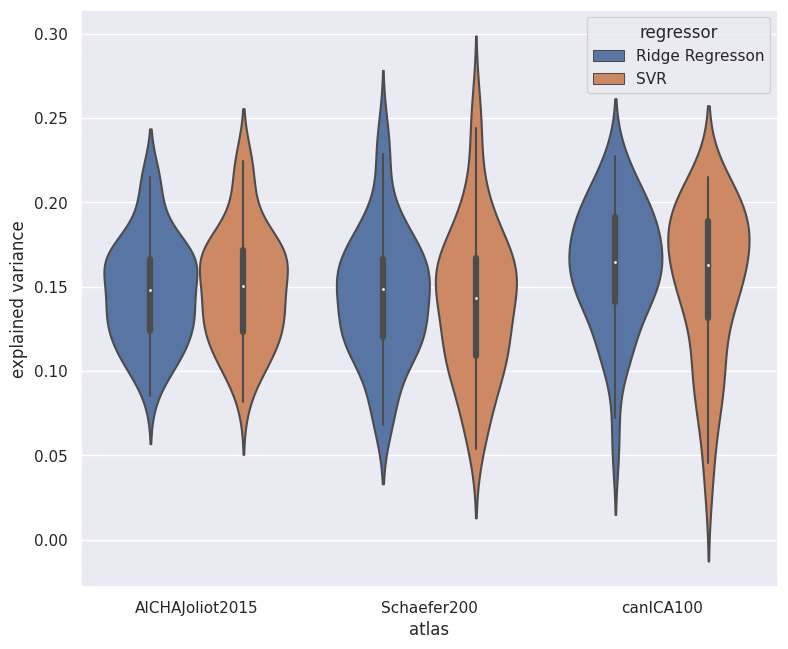

In [234]:

sns.set(rc = {'figure.figsize':(9,7.5)})

plot = sns.violinplot(data = new_try,x = 'atlas',y = 'explained variance',hue = 'regressor',alpha = 1)
fig = plot.get_figure()
fig.savefig(path + 'results/plots/SVRvsRR.pdf')

In [272]:
tang_df_ridge.T.iloc[0,0] = 'atlas

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
Yeo_17,0.112713,0.045483,0.117639,0.070901,0.065181,0.060506,0.121525,0.123749,0.093782,0.053272,...,0.068022,0.042402,0.104547,0.079421,0.04408,0.093663,0.111365,0.100425,0.127099,0.097982
DictLearn400,0.126057,0.064088,0.14606,0.101428,0.092138,0.137536,0.149753,0.169827,0.119132,0.080659,...,0.137163,0.078457,0.153179,0.084965,0.129286,0.114812,0.147701,0.143088,0.202574,0.083494
Destrieux,0.164756,0.109726,0.14498,0.100204,0.109365,0.111283,0.175798,0.116605,0.100824,0.092996,...,0.132995,0.12044,0.123717,0.164384,0.116812,0.078205,0.171227,0.137888,0.208654,0.098042
AAL,0.131239,0.089464,0.148759,0.07994,0.094351,0.118691,0.1457,0.111766,0.090177,0.09209,...,0.158553,0.098221,0.148703,0.111677,0.083695,0.057207,0.129311,0.147805,0.228583,0.109197
Desikan,0.065956,0.047661,0.13674,0.072558,0.060354,0.061899,0.136741,0.132193,0.042327,0.051367,...,0.077789,0.015936,0.133481,0.057932,0.030984,0.048004,0.119048,0.147441,0.17891,0.077565
DesikanKlein,0.116091,0.037242,0.151467,0.081073,0.096497,0.083331,0.153121,0.097234,0.031519,0.073739,...,0.121595,0.036406,0.13634,0.089852,0.065247,0.053713,0.14896,0.149524,0.180236,0.089468
HarvardOxfordcort_maxprob_thr25,0.136635,0.107944,0.099413,0.098797,0.088725,0.069319,0.137392,0.042761,0.027131,0.052908,...,0.074149,0.03419,0.105109,0.036251,0.036251,0.057978,0.099226,0.123153,0.173829,0.106914
JHU,0.038257,0.020662,0.02801,-0.020713,0.042036,0.020697,0.024497,0.012591,-0.013296,-0.011473,...,0.030543,0.017798,0.017432,0.02502,0.005241,0.015094,0.01337,0.031322,0.056363,0.026221
Juelich,0.111121,0.039117,0.115481,0.088938,0.049258,0.100499,0.157577,0.121954,0.076095,0.062468,...,0.103998,0.114554,0.040174,0.091989,0.097862,0.044022,0.053272,0.095832,0.14816,0.086807
DS00350,0.141552,0.08689,0.156892,0.100584,0.099115,0.150871,0.173696,0.161428,0.09752,0.100899,...,0.133256,0.139684,0.145165,0.11887,0.142726,0.10271,0.161553,0.197175,0.223796,0.165601


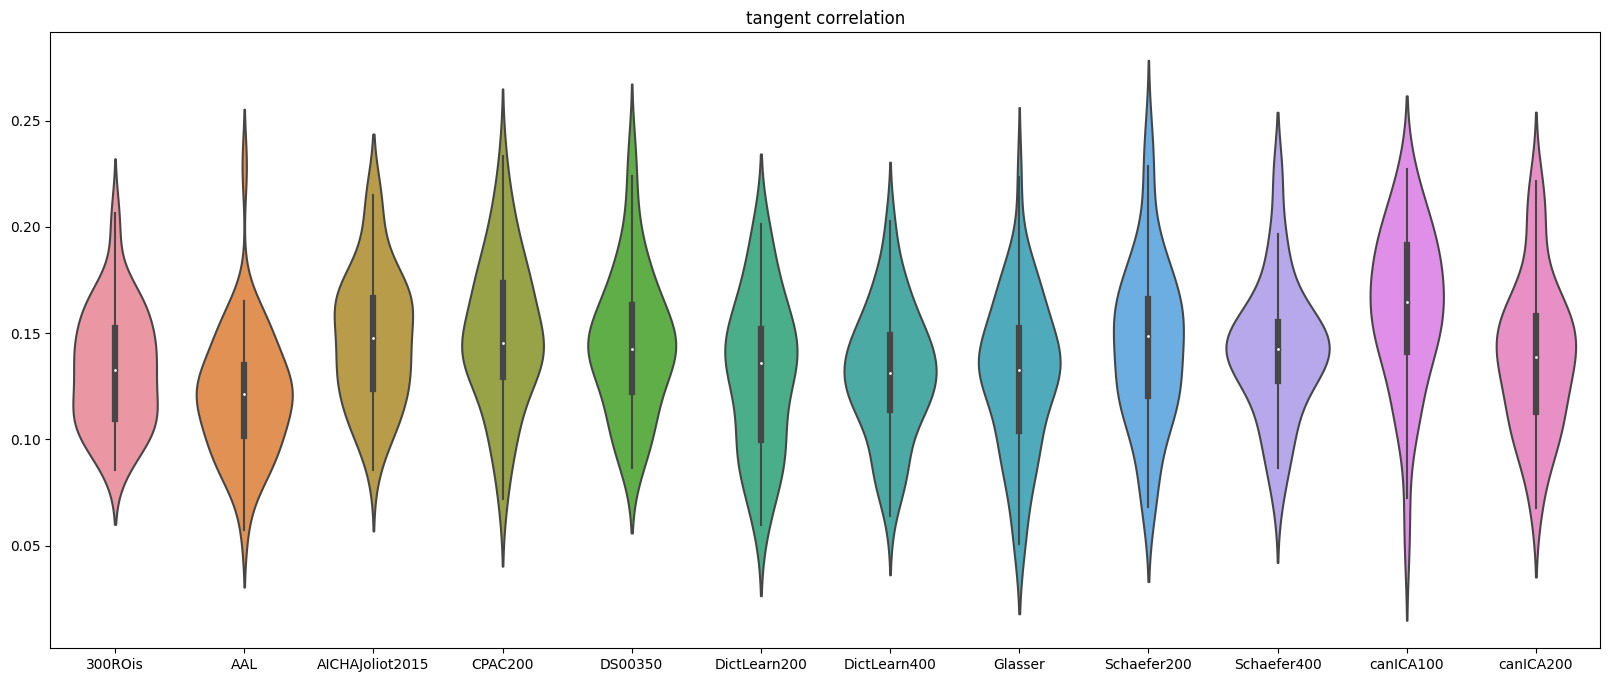

In [120]:
tangent_atlas_names_ [s.split('-')[-1].split('.')[0] for s in tangent_paths_resutls]

tang_df_alphabetical = tang_df.reindex(sorted(tang_df.columns),axis = 1)
plt.figure(figsize=(20,8))
sns.violinplot(data = tang_df_alphabetical)
plt.title('tangent correlation')

#plt.savefig(path + 'results/plots/tangent_corr_relevant_atlases.pdf')
#plt.show()



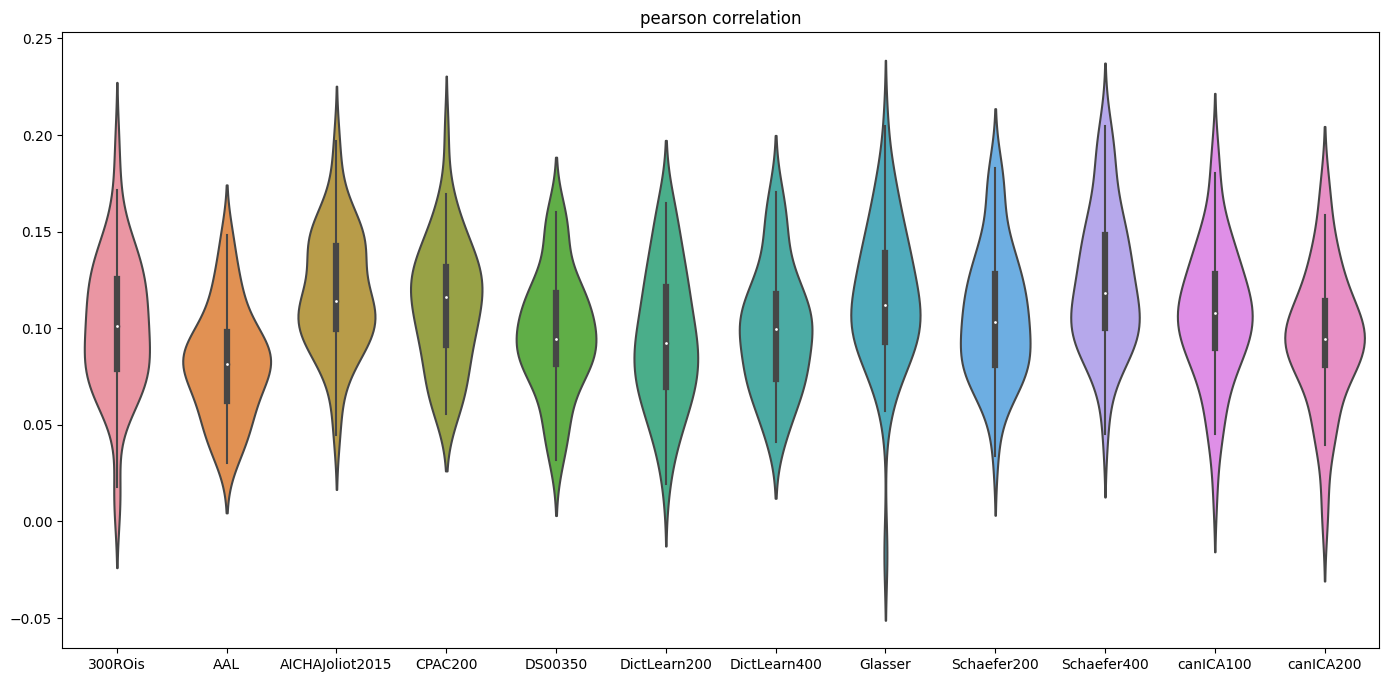

300ROis            0.100926
AAL                0.081438
AICHAJoliot2015    0.114194
CPAC200            0.116092
DS00350            0.094311
DictLearn200       0.092247
DictLearn400       0.099630
Glasser            0.111956
Schaefer200        0.103162
Schaefer400        0.118431
canICA100          0.107921
canICA200          0.094605
dtype: float64
300ROis            0.132485
AAL                0.121122
AICHAJoliot2015    0.147874
CPAC200            0.145250
DS00350            0.142675
DictLearn200       0.136063
DictLearn400       0.131229
Glasser            0.132734
Schaefer200        0.148422
Schaefer400        0.142678
canICA100          0.164812
canICA200          0.138861
dtype: float64


In [126]:
pear_df.columns = [s.split('-')[-1].split('.')[0] for s in pearson_paths_resutls]
pear_df_alphabetical = pear_df.reindex(sorted(pear_df.columns),axis = 1)

plt.figure(figsize=(17,8))
sns.violinplot(data = pear_df_alphabetical)

plt.title('pearson correlation')
#plt.savefig(path + 'results/plots/pearson_corr_relevant_atlases.pdf')
plt.show()
print(pear_df_alphabetical.median())
print(tang_df_alphabetical.median())

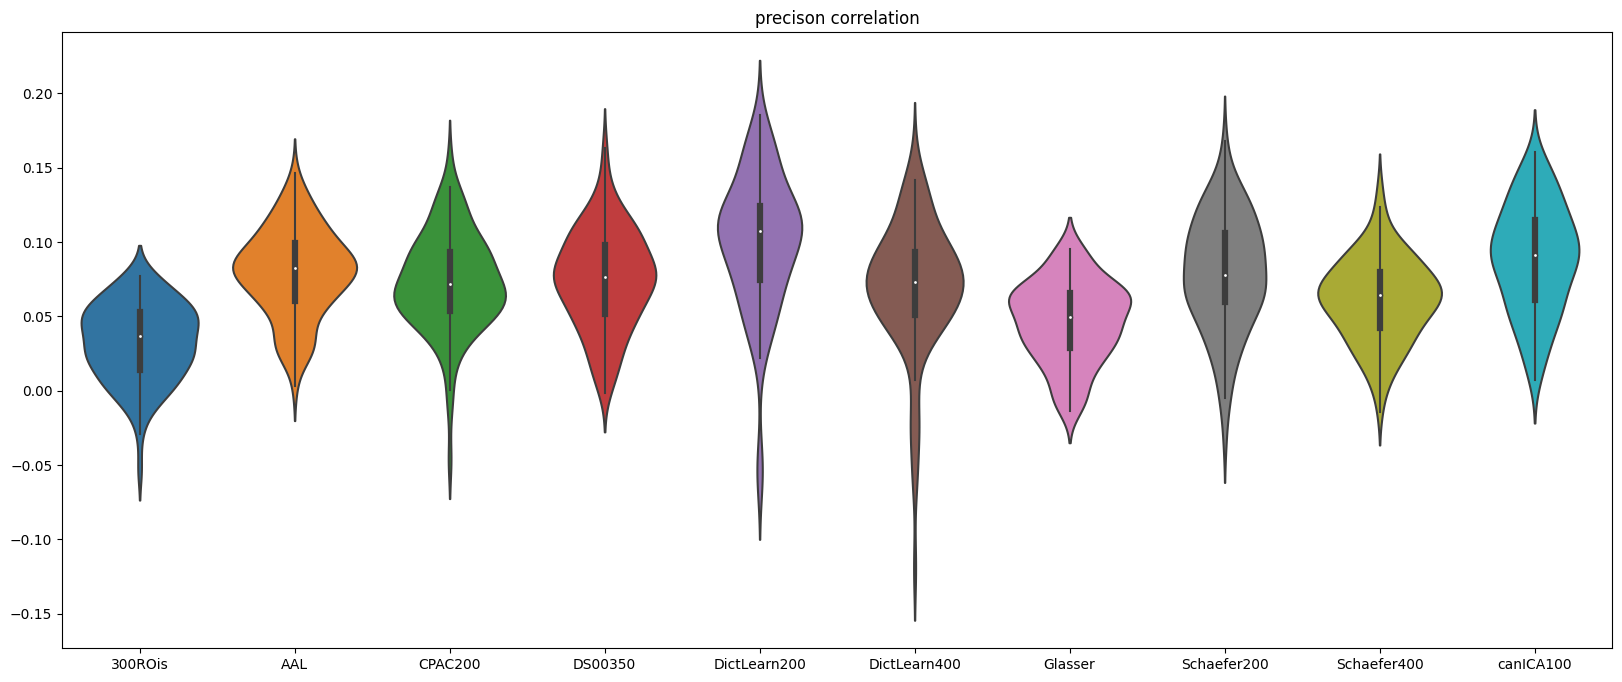

In [135]:


prc_df.columns = [s.split('-')[-1].split('.')[0] for s in prec_paths_results]
prc_df_a = prc_df.reindex(sorted(prc_df.columns),axis = 1)
plt.figure(figsize=(20,8))
sns.violinplot(data = prc_df_a)
plt.title('precison correlation')

plt.savefig(path + 'results/plots/precision_corr_relevant_atlases.pdf')
plt.show()
#

In [127]:
tangent_paths_resutls


['data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DictLearn400.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-AAL.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DS00350.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-CPAC200.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-canICA100.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-canICA200.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-Schaefer400.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-300ROis.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-DictLearn200.csv',
 'data/results/ridge_regression/tangent/ridge_results_newalpha_cor_tangent_atlas-Glasser.csv',
 'data/results/ridge_regression/tang

In [128]:
pearson_paths_resutls

['data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-Glasser.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-Schaefer200.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-canICA100.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-AICHAJoliot2015.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-canICA200.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-DS00350.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-CPAC200.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-DictLearn400.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-Schaefer400.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-300ROis.csv',
 'data/results/ridge_regression/pearson/ridge_results_cor_pearson_atlas-DictLearn200.csv',
 'data/results/ridge_reg

In [137]:
tang_df_cor = pd.concat((pd.read_csv(f)['GCA_corr'] for f in tangent_paths_resutls),axis = 1, ignore_index=True)


In [177]:
pear_df.head()

,Glasser,Schaefer200,canICA100,AICHAJoliot2015,canICA200,DS00350,CPAC200,DictLearn400,Schaefer400,300ROis,DictLearn200,AAL
0,0.104533,0.110665,0.134887,0.113147,0.108509,0.089856,0.126180,0.090894,0.131423,0.077015,0.095859,0.089125
1,0.081416,0.095575,0.045404,0.100607,0.077757,0.082646,0.102038,0.070593,0.120410,0.106518,0.065514,0.066512
2,0.137870,0.124136,0.128137,0.112276,0.076173,0.084779,0.075797,0.076649,0.122899,0.124113,0.066322,0.080855
3,0.101744,0.066241,0.088149,0.103015,0.101716,0.050282,0.103375,0.072139,0.102928,0.067953,0.055277,0.040929
4,0.090923,0.064567,0.015888,0.057524,0.001215,0.031593,0.055715,0.072138,0.062593,0.067061,0.032638,0.051378


In [194]:
largest_tang = pd.DataFrame()
for k in range(tang_df.shape[1]):
    largest_tang[f'atlas{k}'] = tang_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_tang.shape
largest_pear = pd.DataFrame()
for k in range(pear_df.shape[1]):
    largest_pear[f'atlas{k}'] = pear_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_pear.shape

#prc_df = pd.concat((pd.read_csv(f)['GCA_var'] for f in prec_paths_results),axis = 1, ignore_index=True)
#prt_df 

largest_prc = pd.DataFrame()
for k in range(prc_df.shape[1]):
    largest_prc[f'atlas{k}'] = prc_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_prc.shape
largest_prt = pd.DataFrame()
for k in range(prt_df.shape[1]):
    largest_prt[f'atlas{k}'] = prt_df.nlargest(n = 5, columns = k).reset_index()[k]
largest_prt.shape


(5, 12)

In [196]:
print(tang_df.shape,prt_df.shape)

(50, 12) (50, 12)


<Axes: >

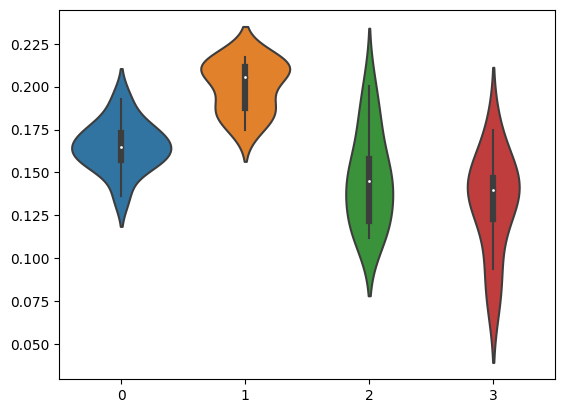

In [197]:
sns.violinplot(data = [largest_pear.mean(),largest_tang.mean(),largest_prt.mean(),largest_prc.mean()])

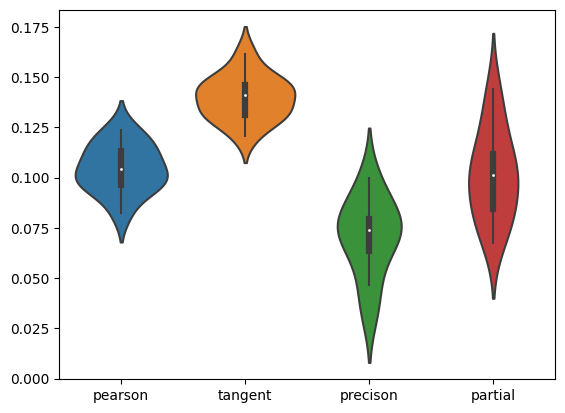

In [209]:
ax = sns.violinplot(data = [pear_df.mean(),tang_df.mean(),prc_df.mean(),prt_df.mean()])

ax.set_xticklabels(['pearson','tangent','precison','partial'])
ax.get_figure().savefig(path + 'results/plots/connectome_building_techiques.pdf')

False

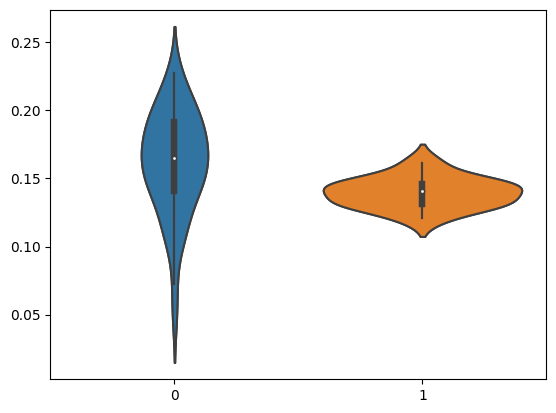

In [213]:
tang_df[tang_df.mean().idxmax()]

sns.violinplot(data = [tang_df[tang_df.mean().idxmax()],tang_df.mean()])

callable(sns.violinplot(data = [tang_df[tang_df.mean().idxmax()],tang_df.mean()])
)